In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [9]:
from google.colab import files
files.upload()  # Choose kaggle.json file you downloaded


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"adnan88","key":"01c1bb664a603012dbe668e37dd3926c"}'}

In [10]:
# Set up Kaggle inside Colab
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [11]:
!kaggle datasets download -d rakeshrau/social-network-ads
#https://www.kaggle.com/datasets/rakeshrau/social-network-ads

Dataset URL: https://www.kaggle.com/datasets/rakeshrau/social-network-ads
License(s): unknown
social-network-ads.zip: Skipping, found more recently modified local copy (use --force to force download)


In [15]:
!unzip social-network-ads.zip -d /content/social_ads_data


Archive:  social-network-ads.zip
replace /content/social_ads_data/Social_Network_Ads.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [13]:
df = pd.read_csv("/content/social_ads_data/Social_Network_Ads.csv")
print(df.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [14]:
# Missing Values
print(df.isnull().sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [37]:
# Feature and Target
#le = LabelEncoder()
#df['Gender'] = le.fit_transform(df['Gender']) # Encode Categorical
X = df[['Age','EstimatedSalary']]
y = df['Purchased']

### Split into Train and Test

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Train the Naive Baye's Model

In [40]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

### Predication

In [41]:
y_pred = model.predict(X_test)

### Evaluation

In [42]:
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy:  0.9375

Confusion Matrix:
 [[50  2]
 [ 3 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



/tmp/ipython-input-1707892299.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


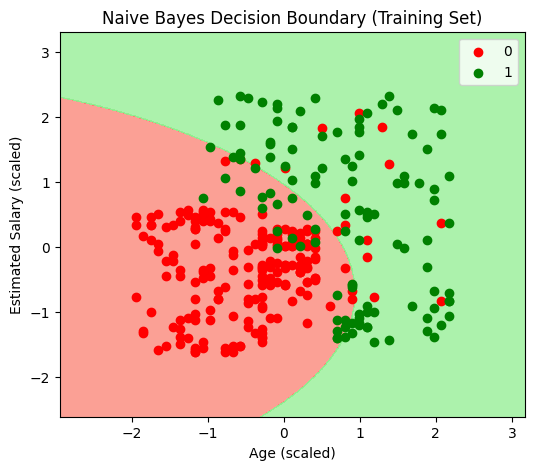

/tmp/ipython-input-1707892299.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


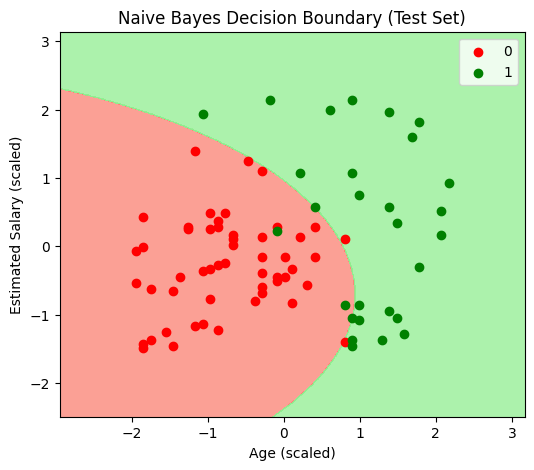

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# --- Function to plot decision boundary ---
def plot_decision_boundary(model, X, y, title):
    X1, X2 = np.meshgrid(
        np.arange(start=X[:, 0].min() - 1, stop=X[:, 0].max() + 1, step=0.01),
        np.arange(start=X[:, 1].min() - 1, stop=X[:, 1].max() + 1, step=0.01)
    )
    plt.contourf(
        X1, X2,
        model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
        alpha=0.75,
        cmap=ListedColormap(('salmon', 'lightgreen'))
    )
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    # Plot actual points
    for i, j in enumerate(np.unique(y)):
        plt.scatter(
            X[y == j, 0], X[y == j, 1],
            c=ListedColormap(('red', 'green'))(i), label=j
        )
    plt.title(title)
    plt.xlabel("Age (scaled)")
    plt.ylabel("Estimated Salary (scaled)")
    plt.legend()

# --- Decision Boundary on Training Data
plt.figure(figsize=(6,5))
plot_decision_boundary(model, X_train, y_train, "Naive Bayes Decision Boundary (Training Set)")
plt.show()

# --- Decision Boundary on Test Data ---
plt.figure(figsize=(6,5))
plot_decision_boundary(model, X_test, y_test, "Naive Bayes Decision Boundary (Test Set)")
plt.show()
